In [4]:
# This code performs a portfolio analysis by simulating the returns of a sample portfolio consisting of 10 stocks, and
# comparing it to the returns of the S&P 500 and Russell 3000.

[*********************100%***********************]  10 of 10 completed


Enter 'p' to allocate percentages or 'd' to allocate dollar amounts:  d
Enter total dollars to allocate:  10000
Enter dollar allocation for AAPL:  10000
Enter dollar allocation for MSFT:  0
Enter dollar allocation for AMZN:  0
Enter dollar allocation for GOOGL:  0
Enter dollar allocation for META:  0
Enter dollar allocation for TSLA:  0
Enter dollar allocation for JPM:  0
Enter dollar allocation for JNJ:  0
Enter dollar allocation for PG:  0
Enter dollar allocation for KO:  0


Expected portfolio return: 0.18%
Standard deviation of portfolio return: 2.09%
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Expected portfolio return for S&P 500: 0.01%
Standard deviation of portfolio return for S&P 500: 1.44%
Expected portfolio return for Russell 3000: 0.00%
Standard deviation of portfolio return for Russell 3000: 0.00%


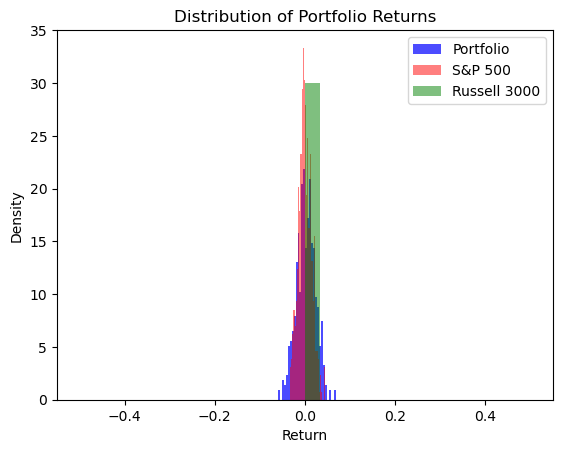

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
# Define the list of stock symbols
stocks = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META', 'TSLA', 'JPM', 'JNJ', 'PG', 'KO']
# Get current stock prices
ticker_data = yf.Tickers(" ".join(stocks))
current_prices = ticker_data.history(period='1d')['Close']
# Define the start and end dates for the historical data
start_date = '2018-05-02'
end_date = '2023-05-02'
# Pull historical data for each stock symbol using yfinance
hist_data = {}
for symbol in stocks:
    ticker = yf.Ticker(symbol)
    data = ticker.history(start=start_date, end=end_date)['Close']
    hist_data[symbol] = data
# Combine the historical data into a single dataframe
df = pd.DataFrame(hist_data)
# Calculate the daily returns of the stocks
returns = df.pct_change().dropna()
# Ask user for portfolio allocation
allocation_type = input("Enter 'p' to allocate percentages or 'd' to allocate dollar amounts: ")
weights = []
if allocation_type == 'p':
    for symbol in stocks:
        weight = float(input(f"Enter percentage allocation for {symbol}: ")) / 100
        weights.append(weight)
elif allocation_type == 'd':
    total_dollars = float(input("Enter total dollars to allocate: "))
    for symbol in stocks:
        dollars = float(input(f"Enter dollar allocation for {symbol}: "))
        weight = dollars / total_dollars
        weights.append(weight)
# Calculate the expected return and standard deviation of each stock
mu = returns.mean()
sigma = returns.std()
# Generate a set of random returns for each stock
num_sims = 500
sim_returns = np.random.normal(mu, sigma, size=(num_sims, len(stocks)))
# Calculate the total portfolio return for each set of random returns
port_returns = []
for sim in sim_returns:
    port_return = np.dot(sim, weights)
    port_returns.append(port_return)
# Calculate the mean and standard deviation of the portfolio returns
mean_return = np.mean(port_returns)
std_return = np.std(port_returns)
# Print the expected return and standard deviation of the portfolio
print("Expected portfolio return: {:.2f}%".format(mean_return * 100))
print("Standard deviation of portfolio return: {:.2f}%".format(std_return * 100))
# Pull historical data for the S&P 500 and Russell 3000 indices
spy_data = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']
russell_data = yf.download('^RUA', start=start_date, end=end_date)['Adj Close']
# Calculate the daily returns of the S&P 500 and Russell 3000 indices
spy_returns = spy_data.pct_change().dropna()
russell_returns = russell_data.pct_change().dropna()
# Calculate the expected return and standard deviation of each index
spy_mu = spy_returns.mean()
spy_sigma = spy_returns.std()
russell_mu = russell_returns.mean()
russell_sigma = russell_returns.std()
# Generate a set of random returns for each index
num_sims = 500
spy_sim_returns = np.random.normal(spy_mu, spy_sigma, size=num_sims)
russell_sim_returns = np.random.normal(russell_mu, russell_sigma, size=num_sims)
#Calculate the total portfolio return for each set of random returns
spy_port_returns = []
russell_port_returns = []
for sim in spy_sim_returns:
    spy_port_return = sim * weights[0]
    spy_port_returns.append(spy_port_return)
for sim in russell_sim_returns:
    russell_port_return = sim * weights[1]
    russell_port_returns.append(russell_port_return)
# Calculate the mean and standard deviation of the portfolio returns for each index
spy_mean_return = np.mean(spy_port_returns)
spy_std_return = np.std(spy_port_returns)
russell_mean_return = np.mean(russell_port_returns)
russell_std_return = np.std(russell_port_returns)
# Print the expected return and standard deviation of the portfolio for each index
print("Expected portfolio return for S&P 500: {:.2f}%".format(spy_mean_return * 100))
print("Standard deviation of portfolio return for S&P 500: {:.2f}%".format(spy_std_return * 100))
print("Expected portfolio return for Russell 3000: {:.2f}%".format(russell_mean_return * 100))
print("Standard deviation of portfolio return for Russell 3000: {:.2f}%".format(russell_std_return * 100))
# Plot the distribution of portfolio returns
plt.hist(port_returns, bins=30, density=True, alpha=0.7, label='Portfolio', color='blue')
plt.hist(spy_port_returns, bins=30, density=True, alpha=0.5, label='S&P 500', color='red')
plt.hist(russell_port_returns, bins=30, density=True, alpha=0.5, label='Russell 3000', color='green')
plt.legend()
plt.title('Distribution of Portfolio Returns')
plt.xlabel('Return')
plt.ylabel('Density')
plt.show()

In [ ]:
# The portfolio analyzer is programmed to include a total of 10 stocks, and a total budget of $10,000.